In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=  pd.read_csv('titanic_toy.csv')

In [3]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [5]:
df.shape

(891, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [9]:
X = df.drop(columns='Survived')
y = df['Survived']

In [10]:
X_train , X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_train.shape , X_test.shape

((712, 3), (179, 3))

In [12]:
X_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [14]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [17]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

In [21]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_mean,Fare_median
858,24.0,19.2583,3,24.0,24.0,19.2583,19.2583
57,28.5,7.2292,0,28.5,28.5,7.2292,7.2292
68,17.0,7.9250,6,17.0,17.0,7.9250,7.9250
103,33.0,8.6542,0,33.0,33.0,8.6542,8.6542
393,23.0,113.2750,1,23.0,23.0,113.2750,113.2750


In [22]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())


Original Age variable variance:  210.2517072477435
Age Variance after median imputation:  169.20731007048155
Age Variance after mean imputation:  168.85193366872227
Original Fare variable variance:  2761.0314349486343
Fare Variance after median imputation:  2637.012481677765
Fare Variance after mean imputation:  2621.232374951235


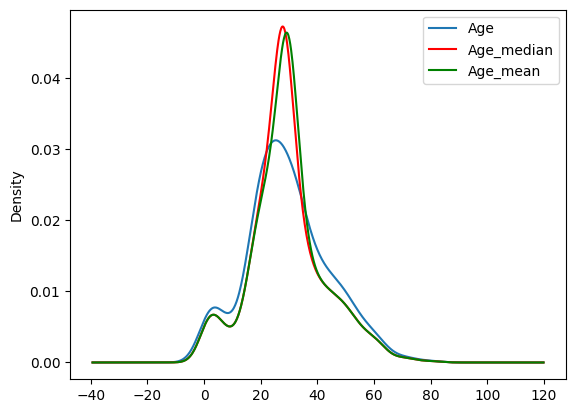

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

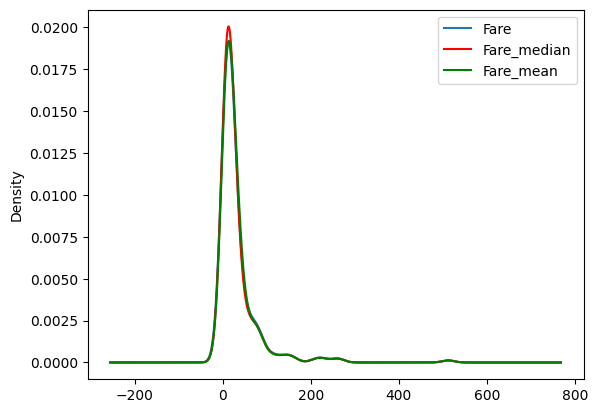

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [26]:
X_train.cov()


,Age,Fare,Family,Age_median,Age_mean,Fare_mean,Fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,17.657433,17.672035
Age_median,210.251707,63.938058,-5.587710,169.207310,168.851934,60.700688,59.728510
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
Fare_mean,71.193767,2761.031435,17.657433,60.700688,57.175304,2621.232375,2621.232375
Fare_median,70.082085,2761.031435,17.672035,59.728510,56.282518,2621.232375,2637.012482


In [27]:
X_train.corr()


,Age,Fare,Family,Age_median,Age_mean,Fare_mean,Fare_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.093496,0.088151,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.255307,-0.256883,0.204981,0.204536
Age_median,1.000000,0.093496,-0.255307,1.000000,0.998949,0.091145,0.089416
Age_mean,1.000000,0.088151,-0.256883,0.998949,1.000000,0.085941,0.084346
Fare_mean,0.088944,1.000000,0.204981,0.091145,0.085941,1.000000,0.997003
Fare_median,0.087232,1.000000,0.204536,0.089416,0.084346,0.997003,1.000000


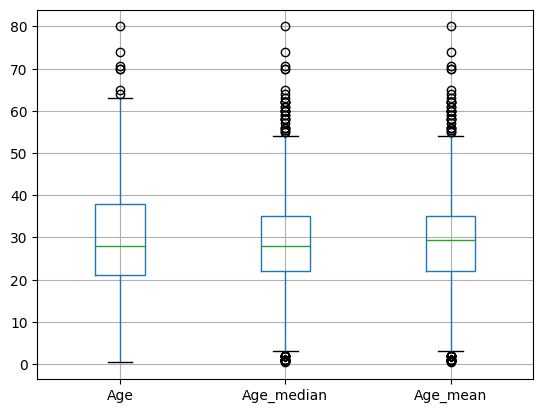

In [28]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()
plt.show()

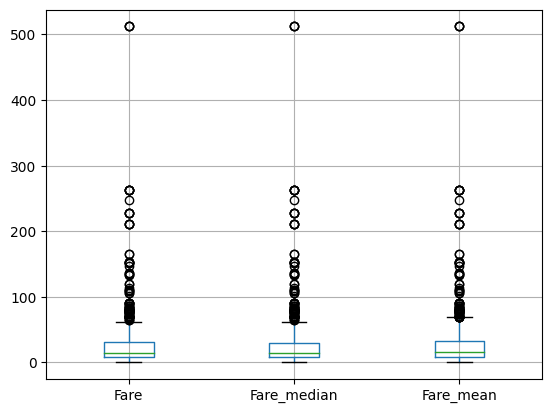

In [29]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()
plt.show()

## Using Sklearn

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [31]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [33]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [34]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [35]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [36]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [37]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [38]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])